In [6]:
import json
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [7]:
with open('C:/Users/agkat/Documents/College/1. SML/A1/domain1_train.json', 'r') as file:
   domain1_data = [json.loads(line) for line in file]

with open('C:/Users/agkat/Documents/College/1. SML/A1/domain2_train.json', 'r') as file:
    domain2_data = [json.loads(line) for line in file]


In [8]:
k1 = [instance['label'] for instance in domain1_data]
v1 = [instance['text'] for instance in domain1_data]

k2 = [instance['label'] for instance in domain2_data]
v2 = [instance['text'] for instance in domain2_data]

In [24]:
data = v1[0:10]
ohe = np.zeros((len(data), 1075, 5001))

for i, sq in enumerate(data):
    print(i,sq)
    for j, d in enumerate(sq):
        ohe[i, j, d] = 1
    # ohe[i, sq, 0] = 1

print(ohe)

0 [70, 746, 825, 109, 2083, 0, 2, 0, 0, 0, 9, 0, 1004, 19, 0, 0, 7, 913]
1 [1209, 179, 1952, 4, 4959, 7, 0, 2, 978, 1522, 6, 2874, 1051, 1]
2 [287, 3, 3330, 0, 23, 12, 13, 465, 74, 8, 0, 8, 4, 1809, 82, 8, 4180, 3378, 8, 22, 0, 0, 3149, 0, 7, 1862, 4, 2960, 607, 797, 7, 89, 0, 1927, 9, 70, 1232, 1]
3 [0, 0, 3, 592, 19, 2, 706, 1439, 2575, 7, 2, 0, 4680, 2575, 3, 38, 2529, 1]
4 [9, 2, 110, 12, 42, 32, 44, 361, 9, 3860, 2358, 3, 42, 32, 0, 398, 473, 6, 260, 1579, 232, 0, 4, 0, 2960, 0, 1]
5 [9, 892, 3, 0, 0, 3, 2, 0, 811, 3, 26, 939, 13, 60, 122, 902, 16, 0, 4, 1076, 2, 1056, 963, 400, 1067, 13, 1512, 994, 4, 32, 74, 4558, 3, 338, 1883, 1198, 108, 2, 2087, 1]
6 [0, 1115, 0, 72, 192, 64, 31, 3295, 33, 0, 1]
7 [2, 1510, 0, 9, 30, 138, 118, 2, 0, 0, 0, 5, 0, 12, 3, 59, 4547, 4, 0, 3, 2119, 22, 40, 0, 0, 3, 0, 0, 7, 0, 0, 415, 2, 0, 1]
8 [0, 1398, 324, 41, 1629, 0, 4162, 0, 4, 3020, 2, 0, 24, 21, 0, 1]
9 [9, 5, 940, 4, 394, 3, 2, 537, 8, 15, 773, 3, 809, 0, 3, 23, 70, 515, 26, 3171, 40, 1524

In [30]:
ohe[1][1]

array([0., 0., 0., ..., 0., 0., 0.])

In [74]:
L0_D1_C = Counter()
L1_D1_C = Counter()

for text, label in zip(v1, k1):
  if label == 0:
      L0_D1_C.update(text)
  elif label == 1:
      L1_D1_C.update(text)

L0_D2_C = Counter()
L1_D2_C = Counter()

for text, label in zip(v2, k2):
  if label == 0:
      L0_D2_C.update(text)
  elif label == 1:
      L1_D2_C.update(text)

In [82]:
# Ensure all 4 are same shape => adding empties so each has 5000 keys
for k in range(5000):
    if k not in L0_D1_C.keys():
        L0_D1_C[k] = 0
    if k not in L1_D1_C.keys():
        L1_D1_C[k] = 0
    if k not in L0_D2_C.keys():
        L0_D2_C[k] = 0
    if k not in L1_D2_C.keys():
        L1_D2_C[k] = 0
        

In [83]:
for k in range(5000):
    if k not in L1_D2_C.keys():
        print(k)

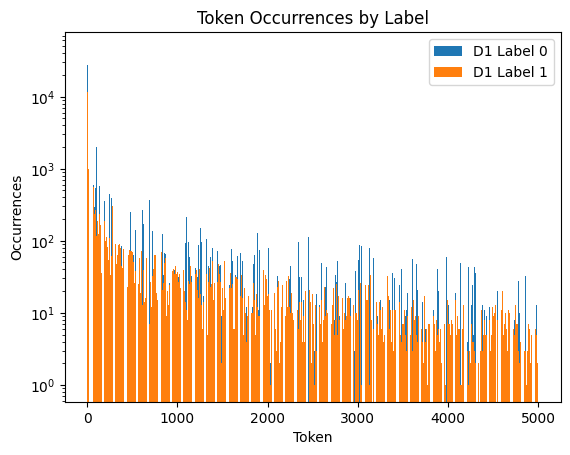

In [88]:
# Domain 1
# Plot for label 0
plt.bar(L0_D1_C.keys(), L0_D1_C.values(), label='D1 Label 0')

# Plot for label 1
plt.bar(L1_D1_C.keys(), L1_D1_C.values(), label='D1 Label 1')

# Customize the plot
plt.xlabel('Token')
plt.ylabel('Occurrences')
plt.title('Token Occurrences by Label')

# Set logarithmic scale
plt.yscale('log')
plt.legend()

# Show the plot
plt.show()

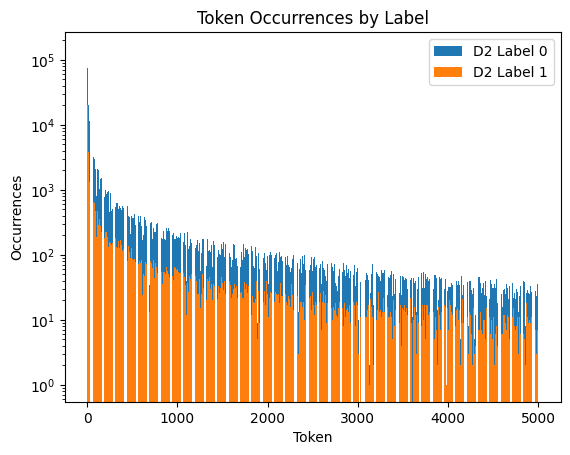

Domain 1 has:  Counter({1: 9750, 0: 9750})
Domain 2 has:  Counter({0: 12750, 1: 2150})


In [95]:
# Domain 2
# Plot for label 0
plt.bar(L0_D2_C.keys(), L0_D2_C.values(), label='D2 Label 0')

# Plot for label 1
plt.bar(L1_D2_C.keys(), L1_D2_C.values(), label='D2 Label 1')

# Customize the plot
plt.xlabel('Token')
plt.ylabel('Occurrences')
plt.title('Token Occurrences by Label')

# Set logarithmic scale
plt.yscale('log')
plt.legend()

# Show the plot
plt.show()

# Numerical comparison 
D1_C = Counter(k1)
D2_C = Counter(k2)

#for k in k1:
#    D1_C.update(k)

#for k in k2:
#    D2_C.update(k)

print("Domain 1 has: ", D1_C)
print("Domain 2 has: ", D2_C)